In [1]:
#5.2 합성곱 신경망 맛보기

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


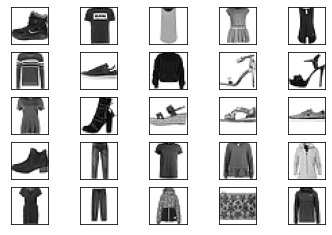

In [4]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',   'Shirt',   'Sneaker',  'Bag',   'Ankle boot']
 
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0
 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
               
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 2s 952us/step - loss: 0.5380 - accuracy: 0.8083
Epoch 2/5
1875/1875 [==============================] - 2s 906us/step - loss: 0.3979 - accuracy: 0.8550
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3656 - accuracy: 0.8663
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3450 - accuracy: 0.8746
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3289 - accuracy: 0.8795
313/313 - 0s - loss: 0.3608 - accuracy: 0.8668


[0.3608403205871582, 0.8668000102043152]

In [6]:
X_train_final = x_train.reshape((-1, 28, 28, 1)) / 255.
X_test_final = x_test.reshape((-1, 28, 28, 1)) / 255.

In [7]:
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,  activation='softmax')
])
 
model_with_conv.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model_with_conv.fit(X_train_final, y_train, epochs=5)
model_with_conv.evaluate(X_test_final,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.8342 - accuracy: 0.6931
Epoch 2/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.5398 - accuracy: 0.8009
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4776 - accuracy: 0.8269
Epoch 4/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.4329 - accuracy: 0.8436
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.4059 - accuracy: 0.8528
313/313 - 1s - loss: 0.4223 - accuracy: 0.8503


[0.42226240038871765, 0.8503000140190125]

In [9]:
# <노트>
# pip install scikit_image: 노트의 내용을 실습하기 위해서는 scikit_image 라이브러리를 설치해야합니다
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

In [10]:
def print_image_summary(image, labels):
    
    print('--------------')
    print('Image Details:')
    print('--------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')
    
    if len(labels) == 1:
        image = image[..., np.newaxis]
        
    for i, lab in enumerate(labels):
        min_val = np.min(image[:,:,i])
        max_val = np.max(image[:,:,i])
        print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')

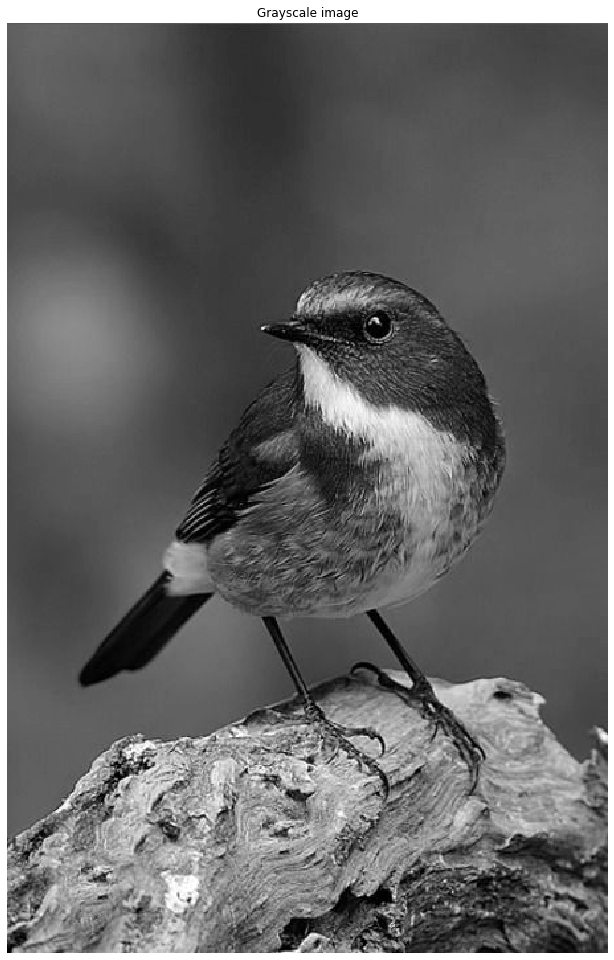

In [11]:
image_gs = imread('../chap5/data/bird.jpg', as_gray=True)
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_gs, ax=ax)
ax.set_title('Grayscale image')
ax.axis('off');

In [12]:
print_image_summary(image_gs, ['G'])
# </노트>

--------------
Image Details:
--------------
Image dimensions: (703, 454)
Channels:
G : min=0.0000, max=1.0000


In [13]:
#5.3 전이학습
# 5.3.1 특성추출(Feature Extractor) 기법

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
model = ResNet50(include_top=True,
                 weights="imagenet",
                 input_tensor=None,
                 input_shape=None,
                 pooling=None,
                 classes=1000)

102973440/102967424 [==============================] - 8s 0us/step


In [16]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [17]:
model.trainable = False
model = Sequential([model,
                    Dense(2, activation='sigmoid')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1000)              25636712  
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2002      
Total params: 25,638,714
Trainable params: 2,002
Non-trainable params: 25,636,712
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = "../chap5/data/catanddog/train"
valid_dir = "../chap5/data/catanddog/validation"


train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )
history=model.fit(train_generator,
          epochs=10,
          validation_data=valid_generator,
          verbose=2)

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Epoch 1/10
13/13 - 8s - loss: 0.6934 - accuracy: 0.4182 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/10
13/13 - 8s - loss: 0.6933 - accuracy: 0.4727 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/10
13/13 - 8s - loss: 0.6934 - accuracy: 0.4727 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/10
13/13 - 8s - loss: 0.6934 - accuracy: 0.4727 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/10
13/13 - 8s - loss: 0.6931 - accuracy: 0.5065 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/10
13/13 - 8s - loss: 0.6929 - accuracy: 0.5273 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/10
13/13 - 8s - loss: 0.6929 - accuracy: 0.5273 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 8/10
13/13 - 8s - loss: 0.6927 - accuracy: 0.5273 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 9/10
13/13 - 8s - loss: 0.6927 - accuracy: 0.5273 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 10/10
13/13 - 8s - loss: 0.6926

In [20]:
#한글깨짐 해결
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

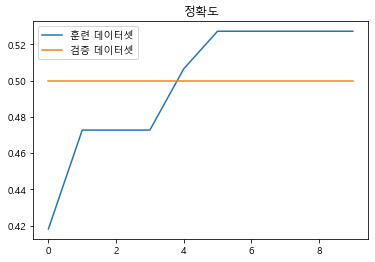

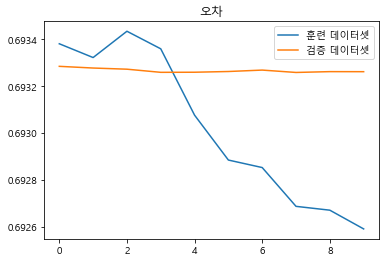

In [21]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()


plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


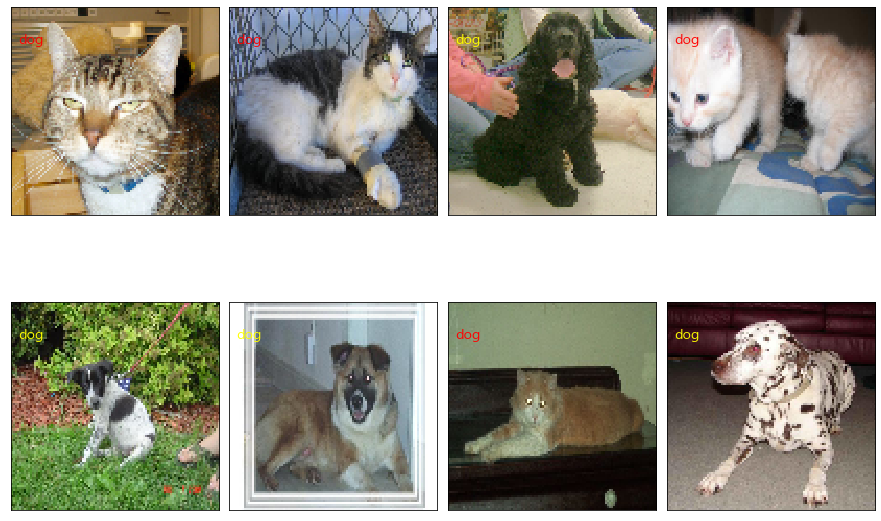

In [22]:
class_names = ['cat', 'dog']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict_classes(validation)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

In [23]:
# 텐서플로 허브를 이용한 코드

In [24]:
#pip install tensorflow_hub
import tensorflow_hub as hub
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                   input_shape=(224, 224, 3),
                   trainable=False),  
    tf.keras.layers.Dense(2, activation='softmax')
])

In [25]:
train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [26]:
history=model.fit(train_generator,
          epochs=10,
          validation_data=valid_generator,
          verbose=2)

Epoch 1/10
13/13 - 22s - loss: 0.8898 - accuracy: 0.7403 - val_loss: 0.3419 - val_accuracy: 0.8673
Epoch 2/10
13/13 - 20s - loss: 0.3538 - accuracy: 0.8675 - val_loss: 0.2667 - val_accuracy: 0.9184
Epoch 3/10
13/13 - 21s - loss: 0.2982 - accuracy: 0.9065 - val_loss: 0.2420 - val_accuracy: 0.9082
Epoch 4/10
13/13 - 21s - loss: 0.2266 - accuracy: 0.9195 - val_loss: 0.2697 - val_accuracy: 0.8878
Epoch 5/10
13/13 - 21s - loss: 0.1383 - accuracy: 0.9532 - val_loss: 0.2380 - val_accuracy: 0.9082
Epoch 6/10
13/13 - 22s - loss: 0.1313 - accuracy: 0.9532 - val_loss: 0.2309 - val_accuracy: 0.9082
Epoch 7/10
13/13 - 21s - loss: 0.1500 - accuracy: 0.9506 - val_loss: 0.2230 - val_accuracy: 0.9184
Epoch 8/10
13/13 - 20s - loss: 0.1357 - accuracy: 0.9429 - val_loss: 0.2321 - val_accuracy: 0.8878
Epoch 9/10
13/13 - 20s - loss: 0.1299 - accuracy: 0.9455 - val_loss: 0.1902 - val_accuracy: 0.9184
Epoch 10/10
13/13 - 22s - loss: 0.1284 - accuracy: 0.9506 - val_loss: 0.2279 - val_accuracy: 0.8980


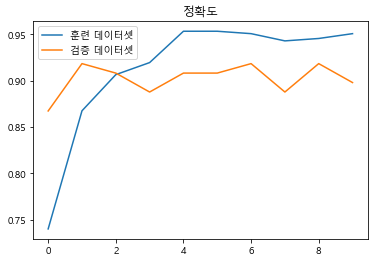

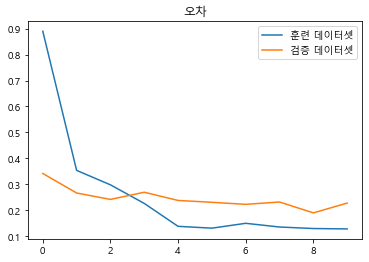

In [27]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

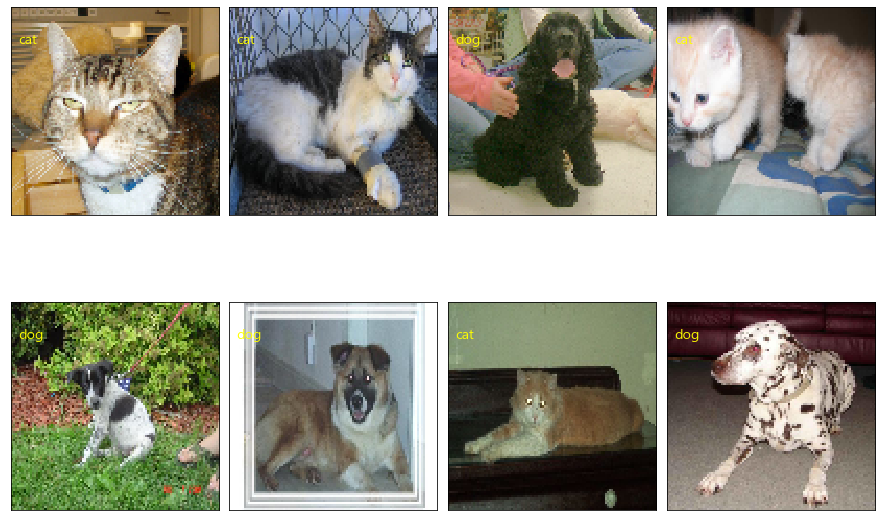

In [28]:
class_names = ['cat', 'dog']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict_classes(validation)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

In [1]:
# 5.4 설명가능한 CNN(eXplainable CNN)
# 5.4.1 특성 맵 시각화

In [2]:
#pip install keras
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [3]:
model= keras.models.Sequential([
    keras.layers.Conv2D(input_shape=(100,100,3), activation='relu', kernel_size=(5,5), filters=32),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 64)          1

In [4]:
ins= model.inputs 
outs= model.layers[0].output  
feature_map= Model(inputs= ins, outputs= outs)  
feature_map.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 96, 96, 32)        2432      
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


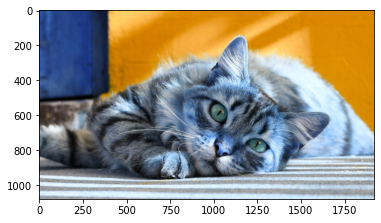

In [5]:
img=cv2.imread("../chap5/data/cat.jpg")   
plt.imshow(img)

(1, 100, 100, 3)
(1, 96, 96, 32)


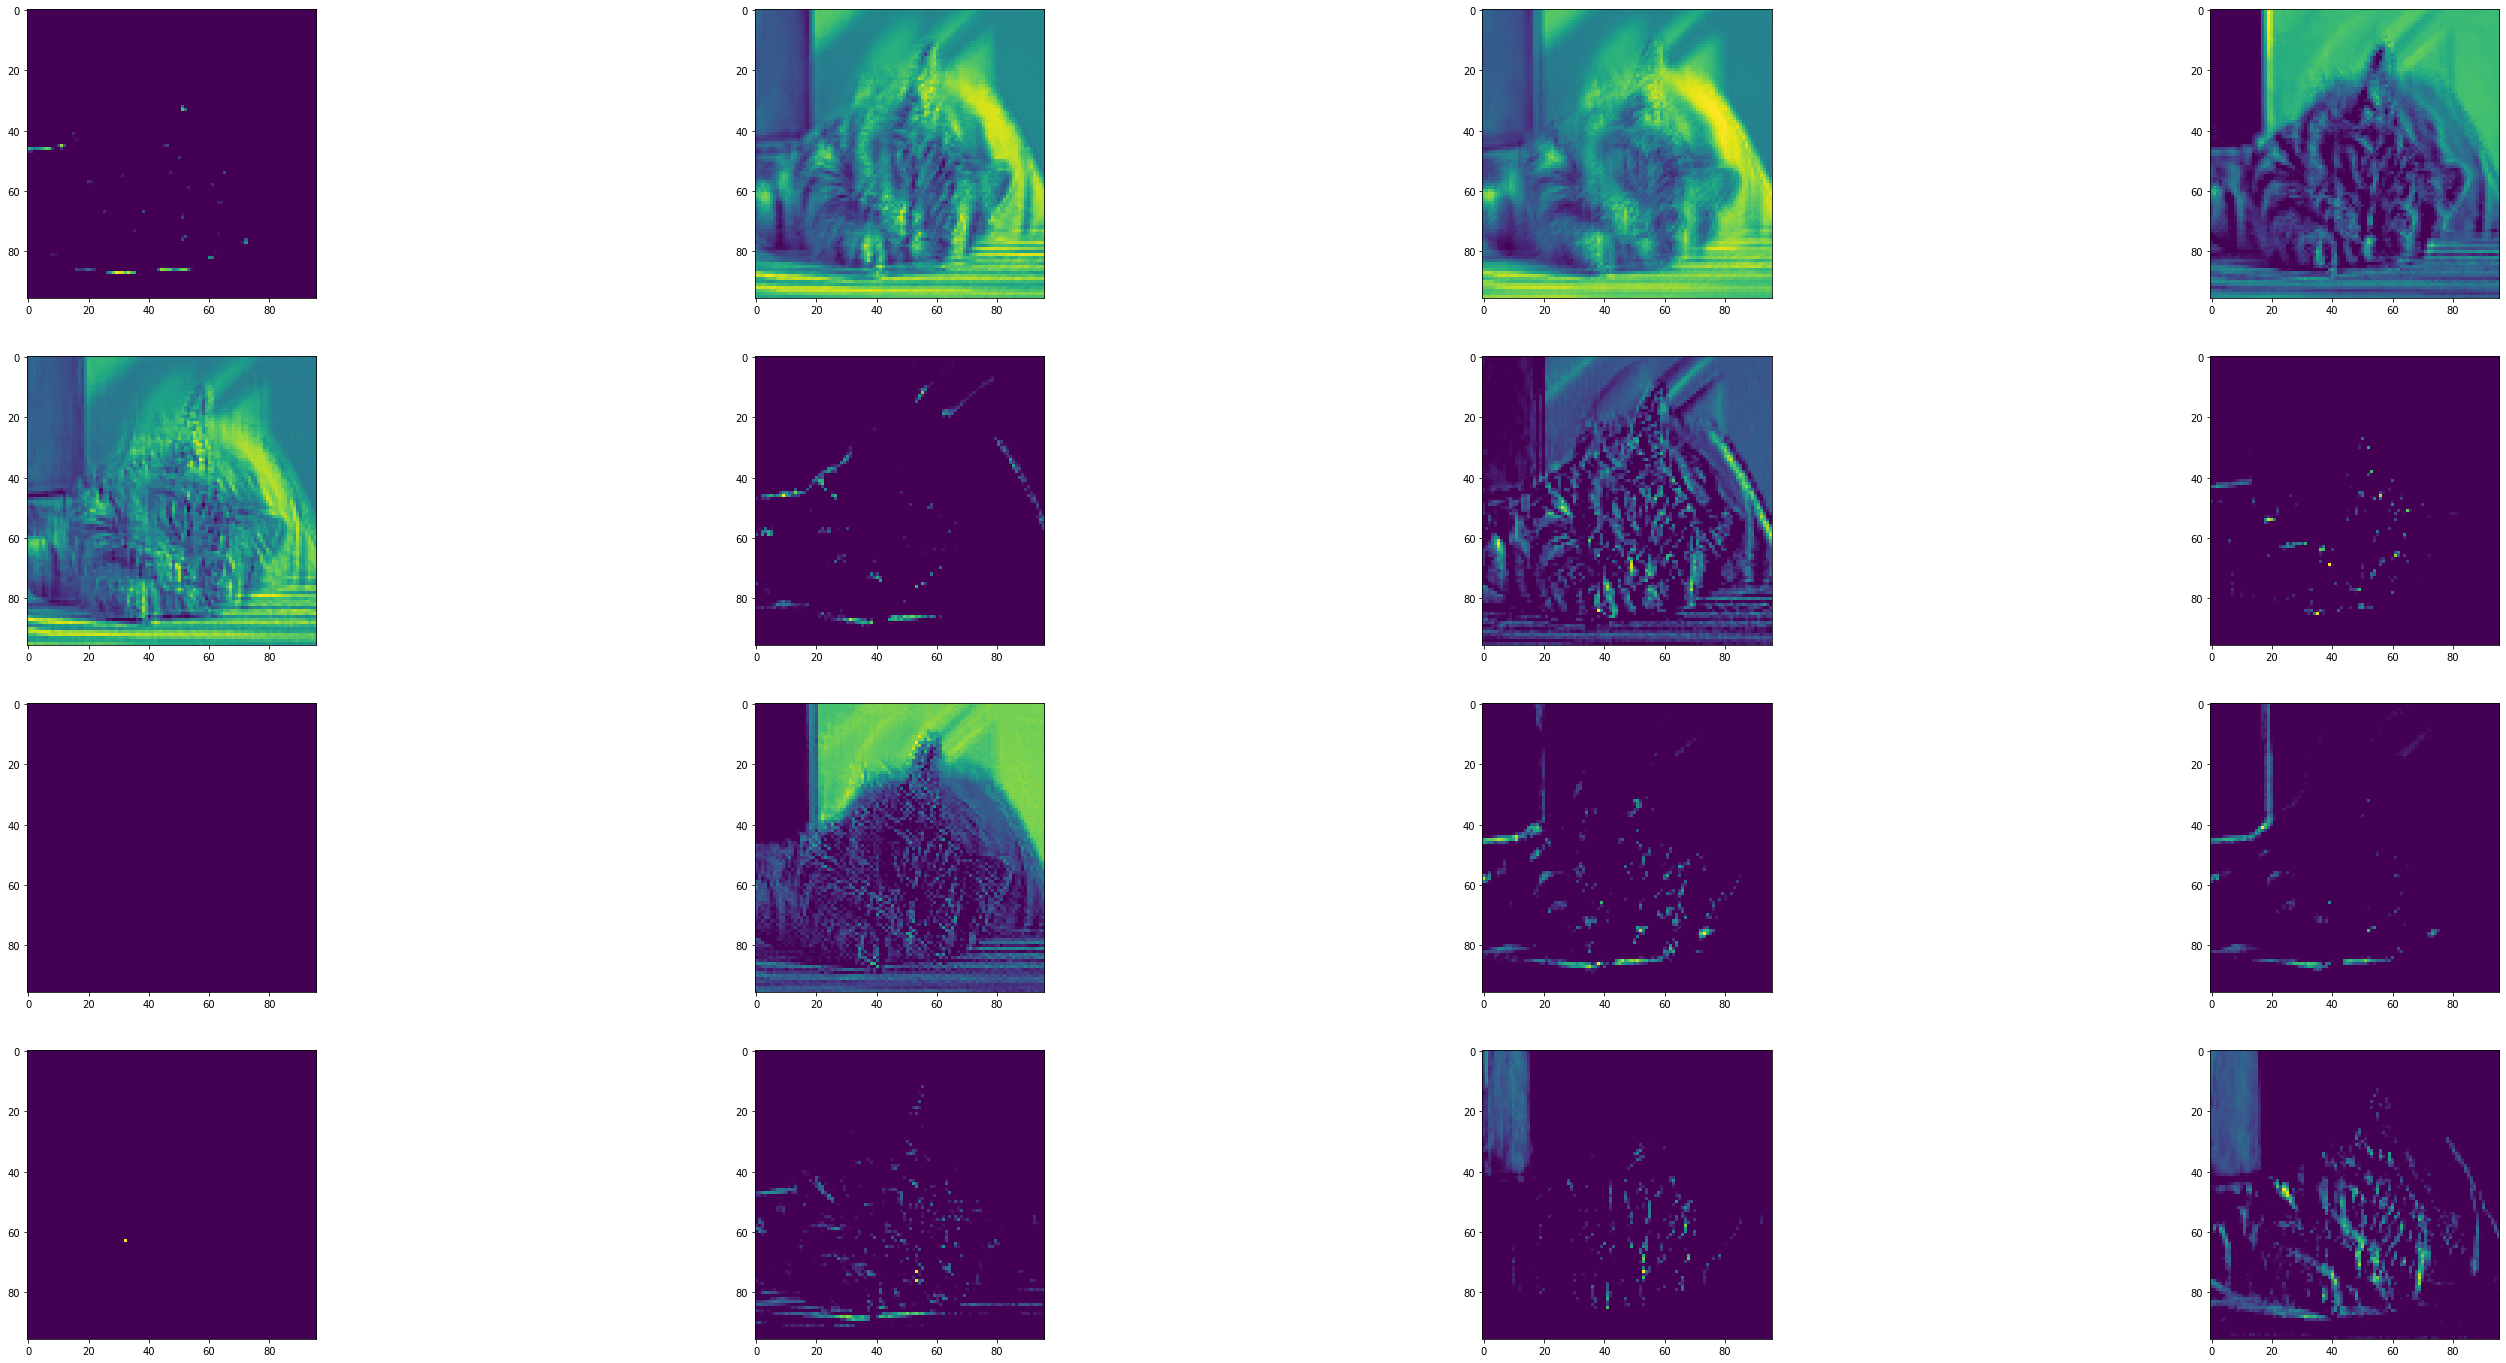

In [6]:
img=cv2.resize(img,(100,100))               
input_img= np.expand_dims(img, axis=0)      
print(input_img.shape)                      
feature=feature_map.predict(input_img)       
print(feature.shape)                            
fig= plt.figure(figsize=(50,50))
for i in range(16):
    ax=fig.add_subplot(8,4,i+1)
    ax.imshow(feature[0,:,:,i])    

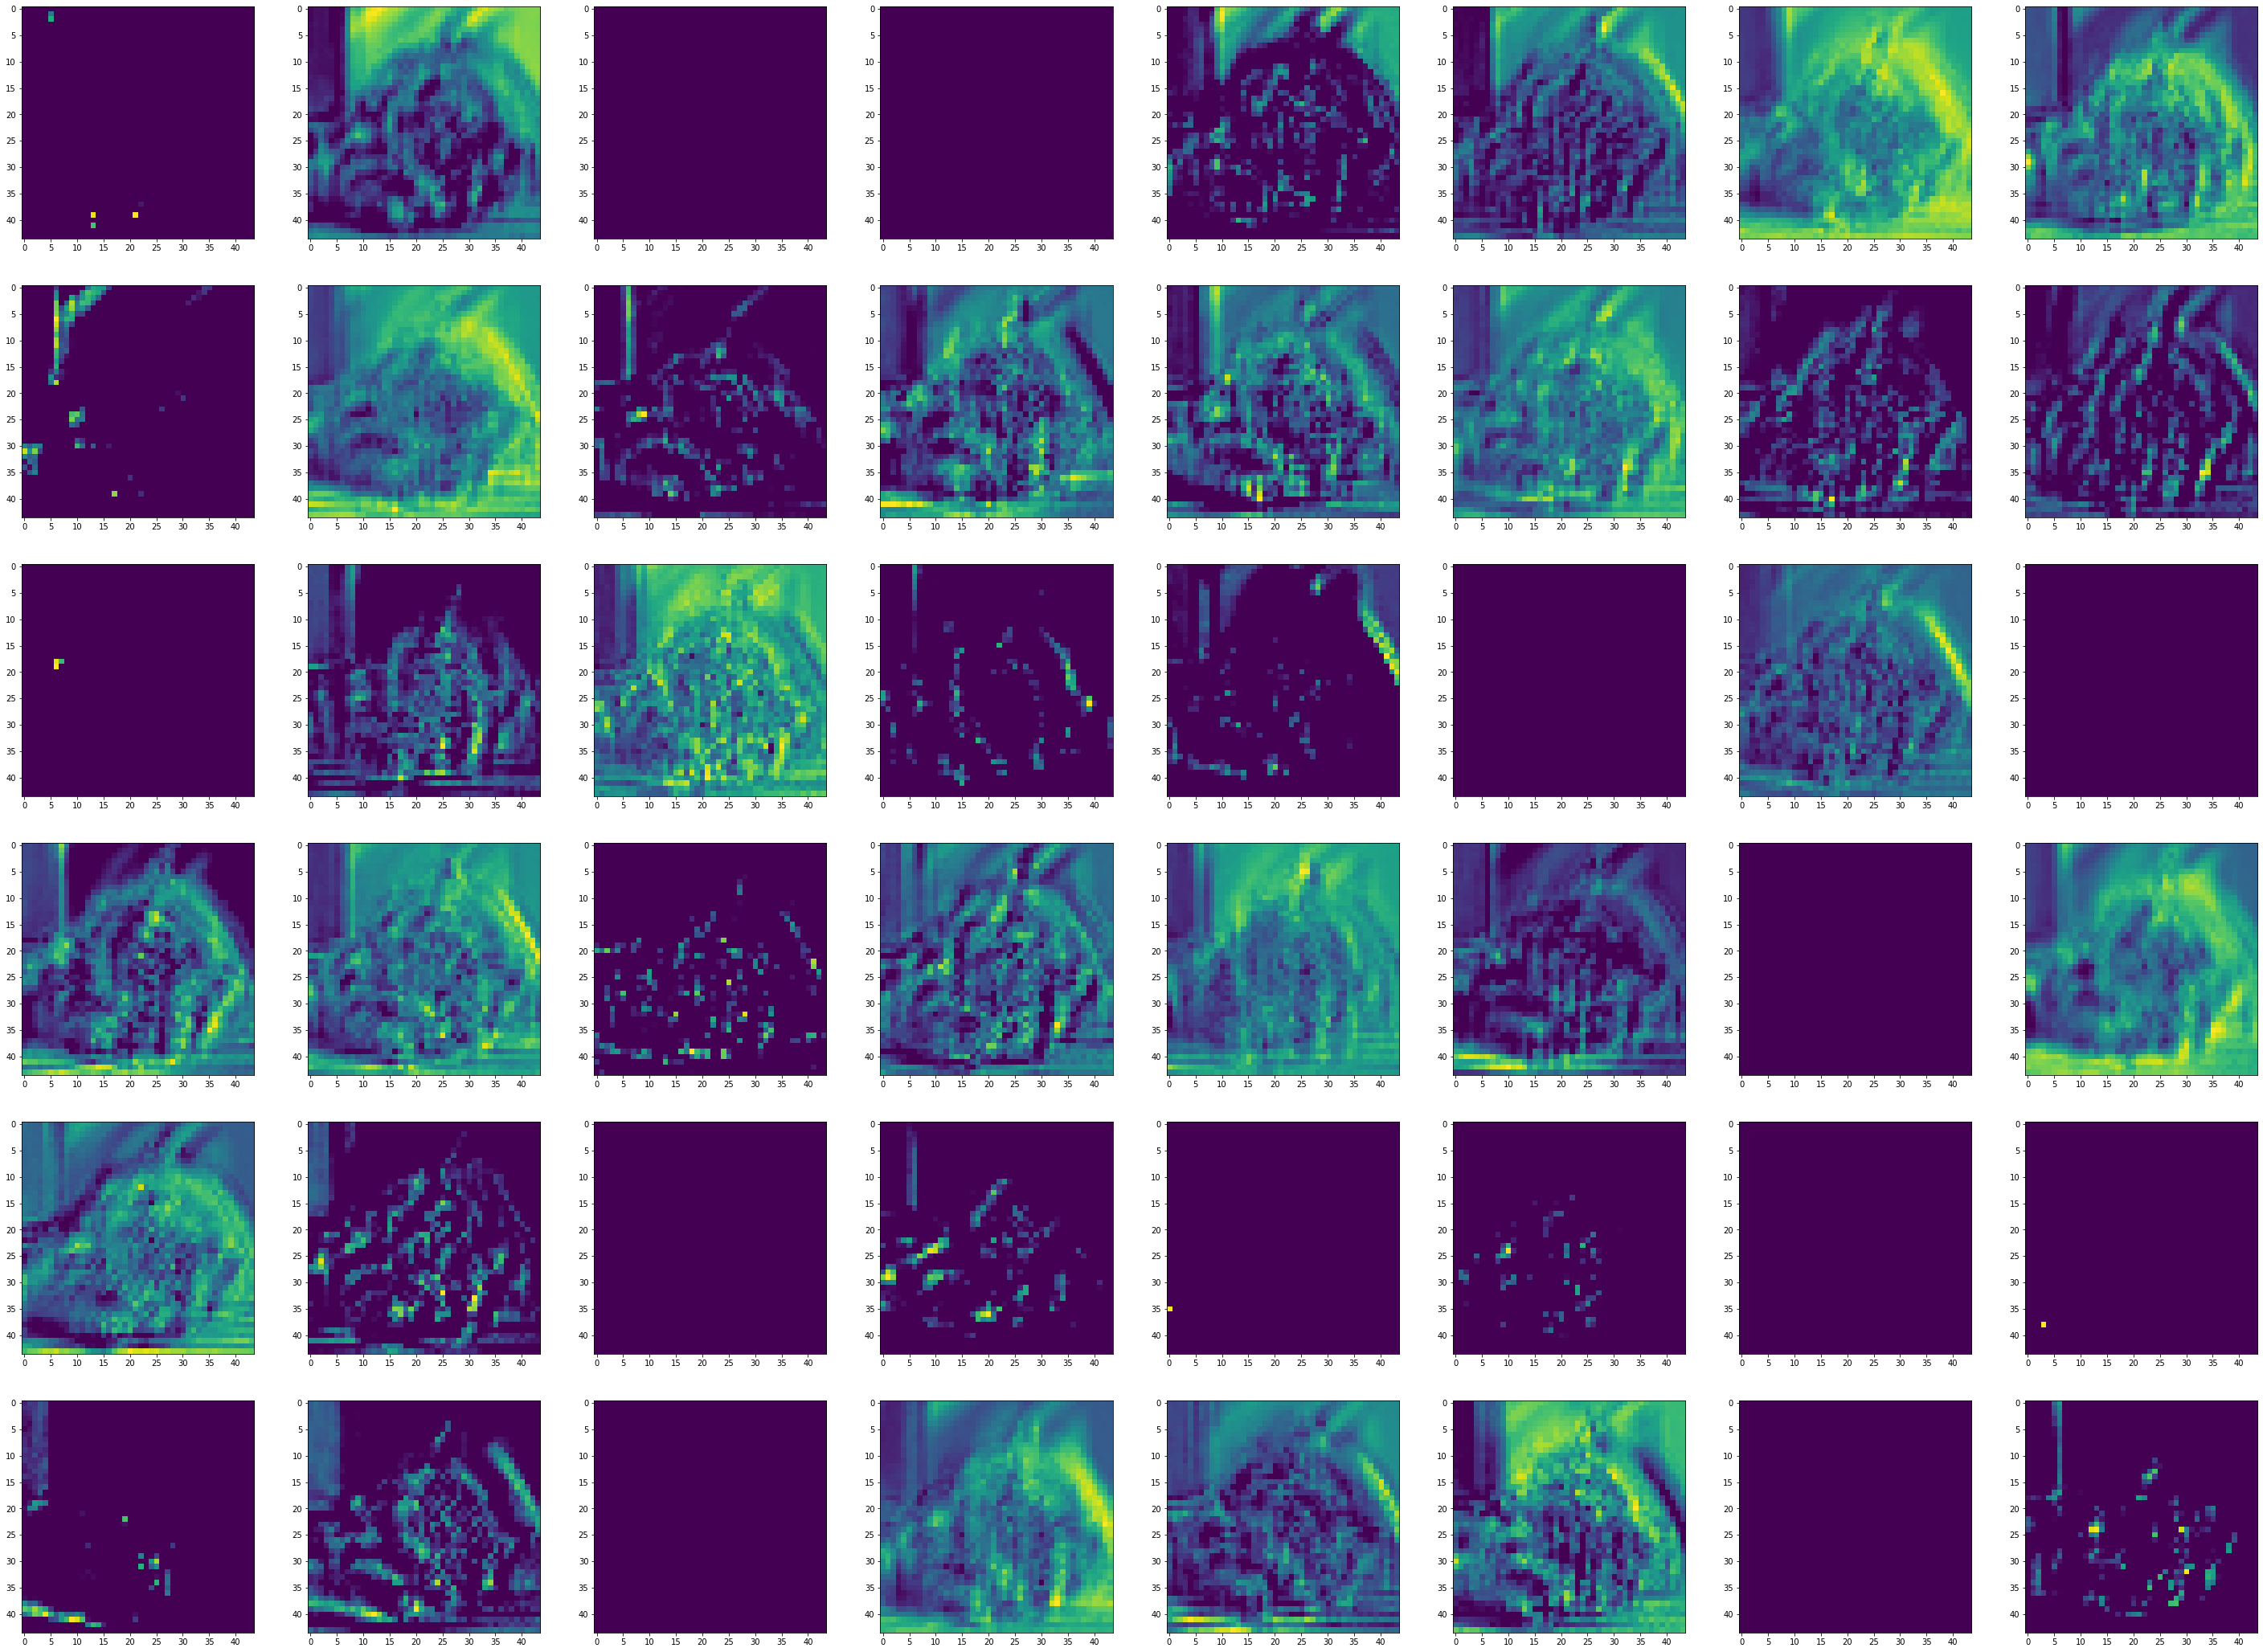

In [7]:
ins= model.inputs 
outs= model.layers[2].output  
feature_map= Model(inputs= ins, outputs= outs)  
img=cv2.imread("../chap5/data/cat.jpg")                   
img=cv2.resize(img,(100,100))               
input_img= np.expand_dims(img, axis=0)   

feature=feature_map.predict(input_img)        
fig= plt.figure(figsize=(50,50))
for i in range(48):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(feature[0,:,:,i])

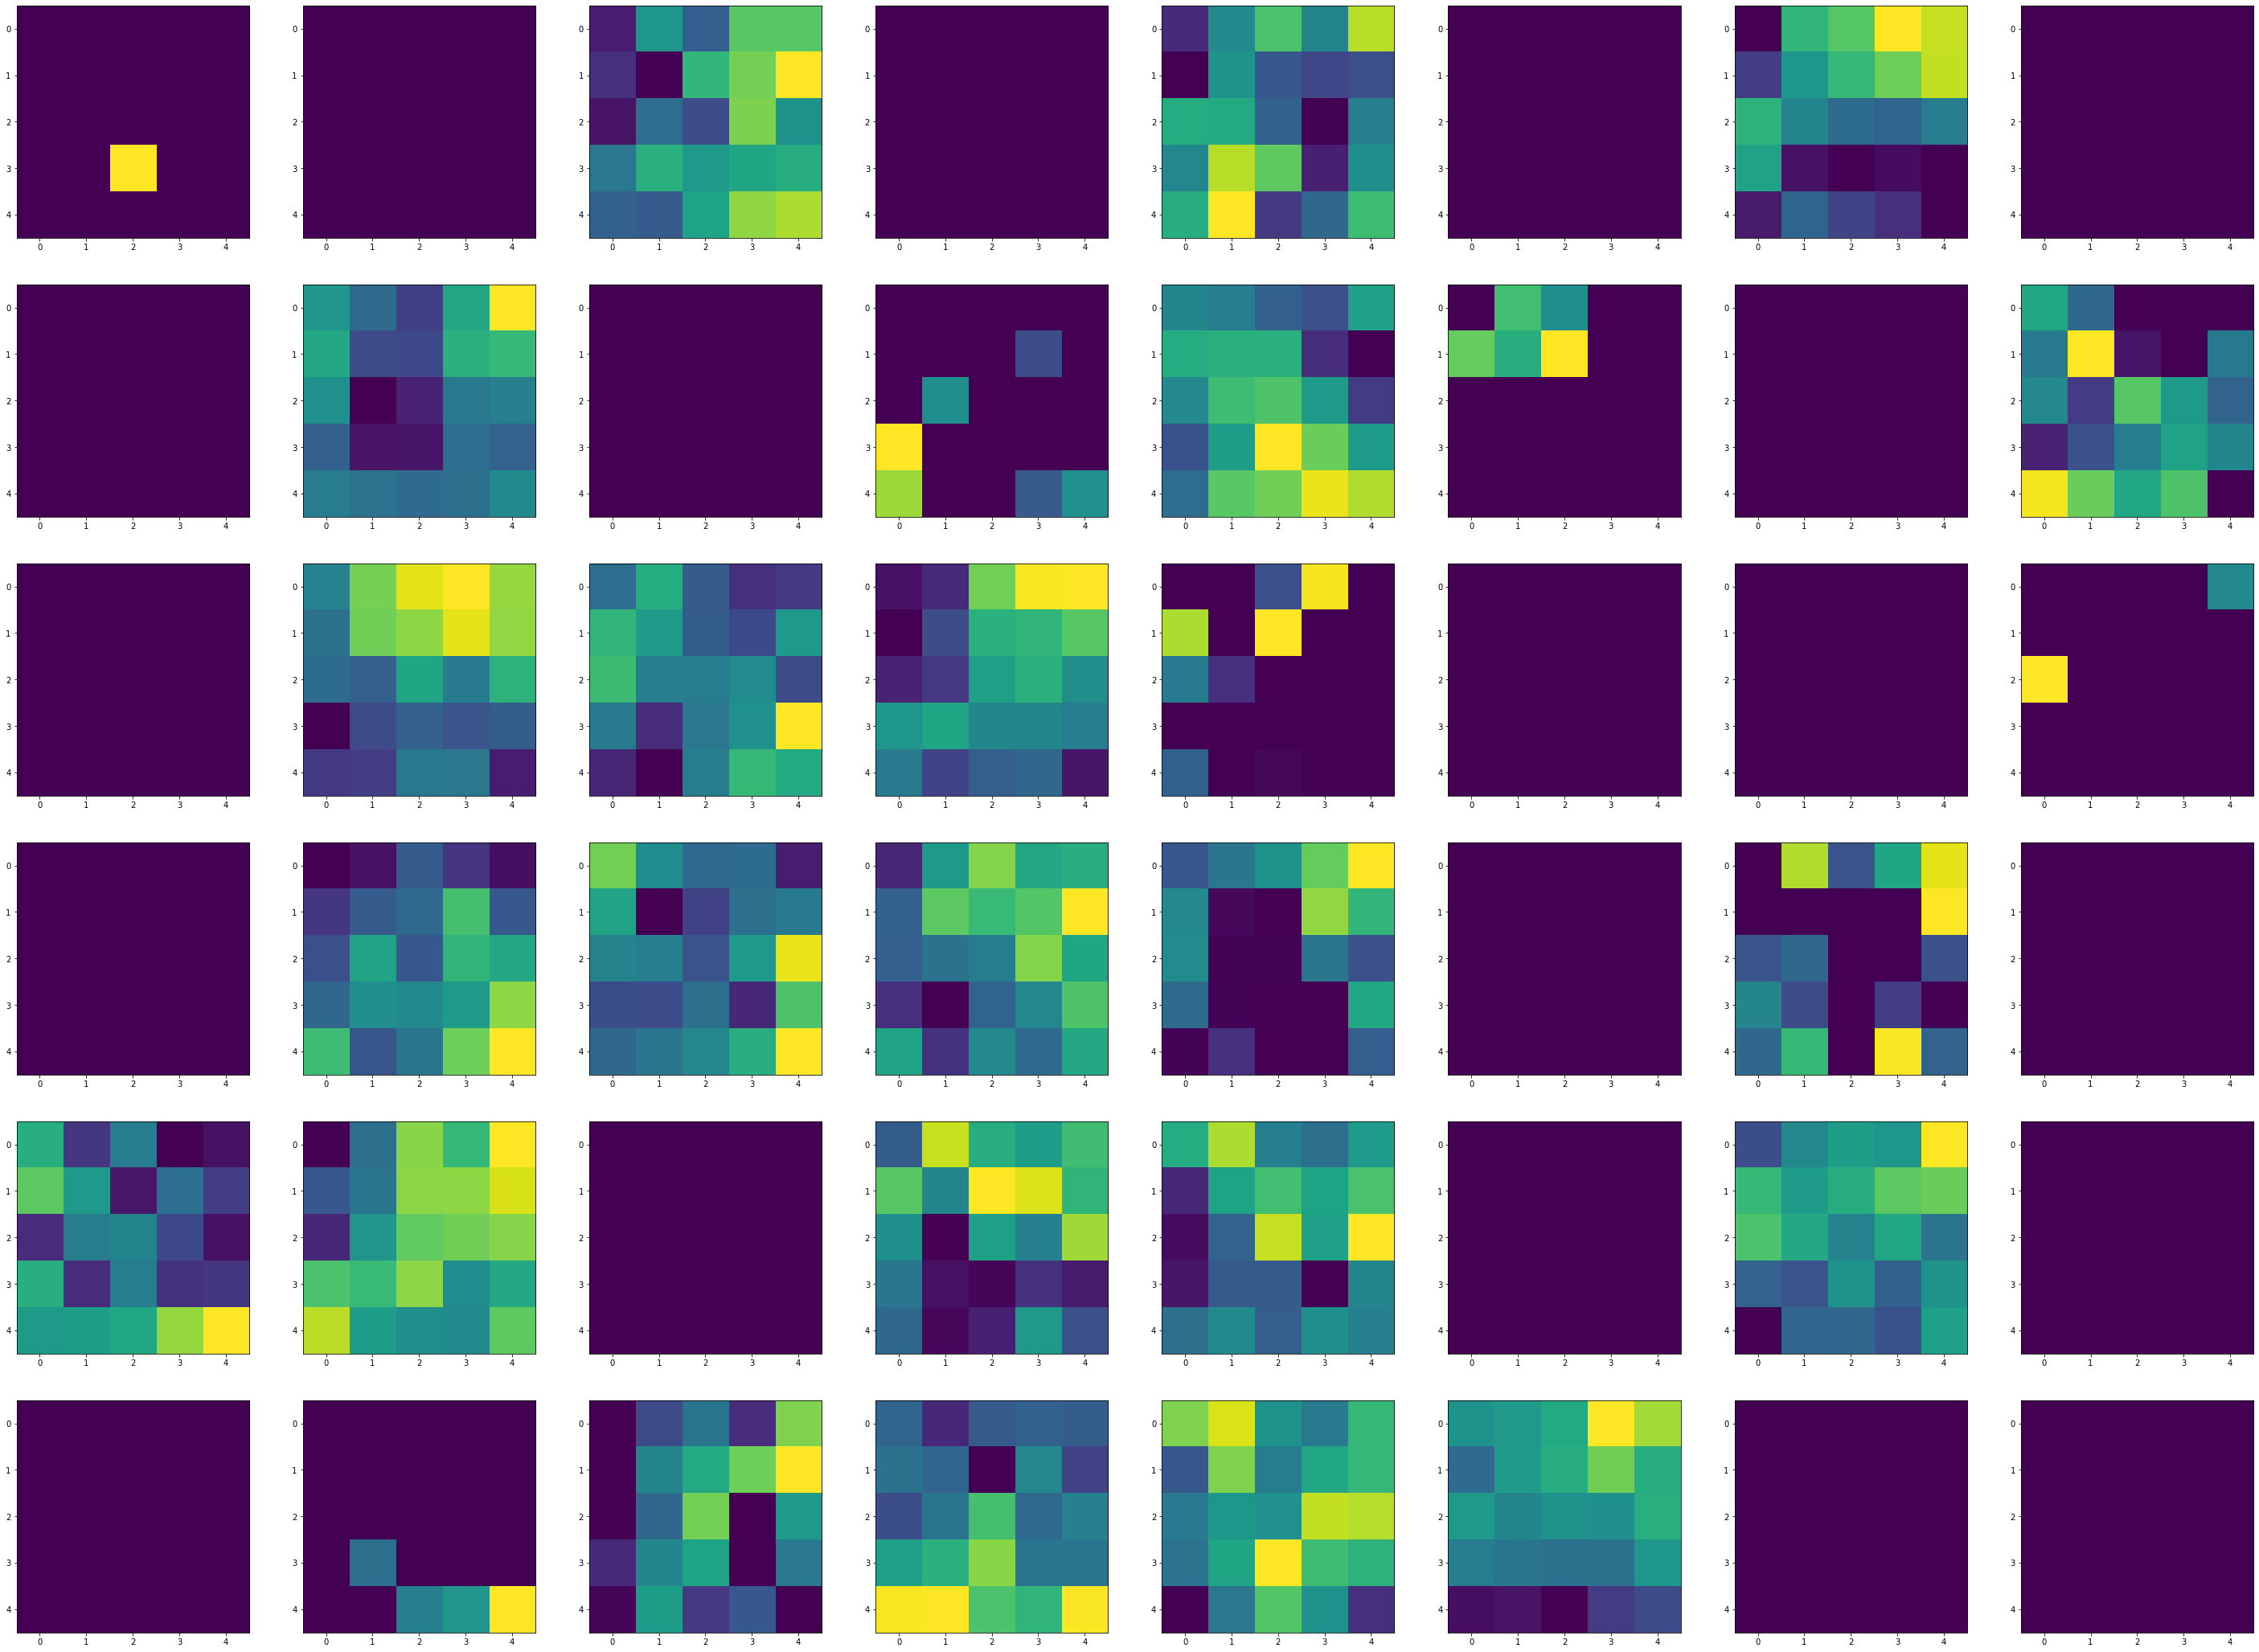

In [8]:
ins= model.inputs 
outs= model.layers[6].output  
feature_map= Model(inputs= ins, outputs= outs)  
img=cv2.imread("../chap5/data/cat.jpg")                   
img=cv2.resize(img,(100,100))               
input_img= np.expand_dims(img, axis=0)      
                      
feature=feature_map.predict(input_img)        
fig= plt.figure(figsize=(50,50))
for i in range(48):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(feature[0,:,:,i])